In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import seaborn as sns

In [2]:
files=['Sales/Sales_April_2019.csv','Sales/Sales_August_2019.csv','Sales/Sales_December_2019.csv','Sales/Sales_February_2019.csv','Sales/Sales_January_2019.csv','Sales/Sales_July_2019.csv','Sales/Sales_June_2019.csv','Sales/Sales_March_2019.csv','Sales/Sales_May_2019.csv','Sales/Sales_November_2019.csv','Sales/Sales_October_2019.csv','Sales/Sales_September_2019.csv']

## Reading Files

In [3]:
months=pd.DataFrame()
for file in files:
    current=pd.read_csv(file)
    months=pd.concat([months,current])

In [4]:
months.to_csv("merged.csv", index=False)
sales_read=pd.read_csv("merged.csv")
sales_read.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Analyzing the Data set

In [5]:
sales_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
sales_read.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


### Removing Null Columns

In [7]:
cleaned=sales_read.dropna(axis=0)

In [8]:
cleaned.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [9]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
temp=cleaned[cleaned['Order Date'] == 'Order Date']
cleaned=cleaned[cleaned['Order Date'] != 'Order Date']

In [11]:
nan_df=cleaned[cleaned['Order Date'].isna()] 
cleaned=cleaned.dropna(axis=0,how='all')
pd.to_datetime(cleaned['Order Date'][0]).month
cleaned['Order Date']=pd.to_datetime(cleaned['Order Date'])

C:\Users\Sana Khan\AppData\Local\Temp\ipykernel_7860\1734497429.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned['Order Date']=pd.to_datetime(cleaned['Order Date'])


In [12]:
cleaned['Quantity Ordered']=cleaned['Quantity Ordered'].astype('int') 
cleaned['Month']=cleaned['Order Date'].dt.month.astype('int') 
cleaned['Price Each']=cleaned['Price Each'].astype('float')

### Added a new column- Sales(Quantity Ordered * Price Each)

In [13]:
cleaned['Sales']=cleaned['Quantity Ordered']*cleaned['Price Each']  
cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Adding columns- Street, City, Zip code

In [14]:
cleaned[['Street','City','Zip Code']]=cleaned['Purchase Address'].str.split(",",n=2,expand=True) 
cleaned['State']=cleaned['Zip Code'].str.split(' ', n=2, expand=True)[1]

In [15]:
cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip Code,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,CA


In [16]:
cleaned['Hour']=cleaned['Order Date'].dt.hour.astype('int')
cleaned['Minute']=cleaned['Order Date'].dt.minute.astype('int') 
cleaned['Count']=1 
cleaned.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip Code,State,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,917 1st St,Dallas,TX 75001,TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,682 Chestnut St,Boston,MA 02215,MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,333 8th St,Los Angeles,CA 90001,CA,9,27,1


### Question 1: What was the best month for sales? How much was earned that month??

In [17]:
res=cleaned.groupby('Month')['Sales'].sum()
res

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

### Answer: Last month i.e., December was the best month for sales. 4613443.34 was earned that month. 

C:\Users\Sana Khan\AppData\Local\Temp\ipykernel_7860\3002223620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


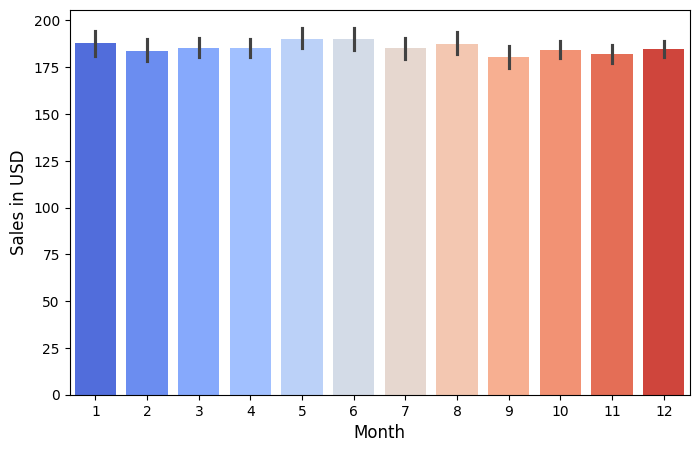

In [42]:
month=[i for i in range(1,13)]
plt.figure(figsize=(8,5))
sns.barplot(
    data=cleaned,
    x="Month",
    y="Sales",
    palette="coolwarm",
    saturation=1
)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales in USD", fontsize=12)
plt.show()

### Question 2: What city sold the most product?

In [19]:
res2=cleaned.groupby(['City','State'])['Sales'].sum()
res2

City           State
Atlanta        GA       2795498.58
Austin         TX       1819581.75
Boston         MA       3661642.01
Dallas         TX       2767975.40
Los Angeles    CA       5452570.80
New York City  NY       4664317.43
Portland       ME        449758.27
               OR       1870732.34
San Francisco  CA       8262203.91
Seattle        WA       2747755.48
Name: Sales, dtype: float64

### Answer: San Francisco

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [20]:
cleaned.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip Code,State,Minute,Count
Hour,,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


### Answer: at 19:00

C:\Users\Sana Khan\AppData\Local\Temp\ipykernel_7860\1307107897.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


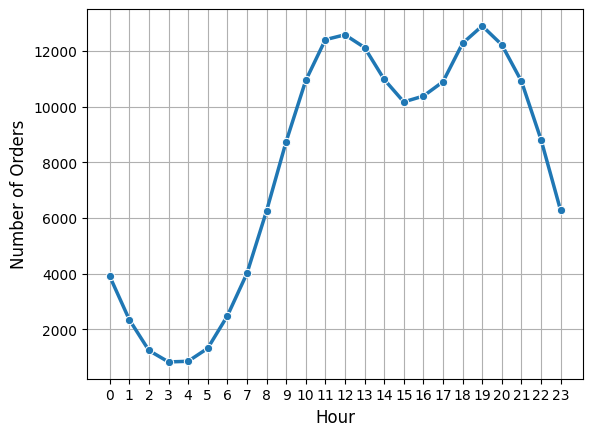

In [43]:
hours = [hour for hour, df in cleaned.groupby('Hour')]

sns.lineplot(
    x=hours,
    y=cleaned.groupby(['Hour']).size(),
    marker="o",
    linewidth=2.5,
    palette="viridis" 
)

plt.xticks(hours)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)

plt.grid(True)
plt.show()

### Question 4: What products are most often sold together?

In [22]:
dup=cleaned[cleaned['Order ID'].duplicated(keep=False)]
dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip Code,State,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,CA,19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,CA,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,MA,11,31,1


In [23]:
dup['Group']=dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dup.head()

C:\Users\Sana Khan\AppData\Local\Temp\ipykernel_7860\1646243546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Group']=dup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,Zip Code,State,Hour,Minute,Count,Group
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,669 Spruce St,Los Angeles,CA 90001,CA,14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,20 Hill St,Los Angeles,CA 90001,CA,19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,20 Hill St,Los Angeles,CA 90001,CA,19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,823 Highland St,Boston,MA 02215,MA,11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [26]:
dup = dup[['Order ID', 'Group']].drop_duplicates()
dup.head(10)

,Order ID,Group
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [27]:
count=Counter()
for i in dup['Group']:
    row=i.split(',')
    count.update(Counter(combinations(row,2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5: What product sold the most? Why do you think it sold the most?

In [28]:
cleaned.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

### Answer: AAA Batteries

C:\Users\Sana Khan\AppData\Local\Temp\ipykernel_7860\557989778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


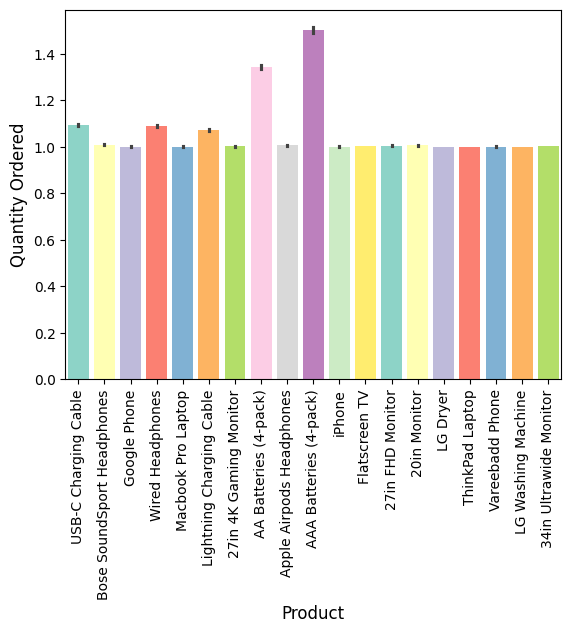

In [49]:
product = [prod for prod, df in cleaned.groupby('Product')]
sns.barplot(
    data=cleaned,
    x="Product",
    y="Quantity Ordered",
    palette="Set3",
    saturation=1
)

plt.xticks(rotation=90)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Quantity Ordered", fontsize=12)

plt.show()

### Sales in Each Region

C:\Users\Sana Khan\AppData\Local\Temp\ipykernel_7860\4220406079.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


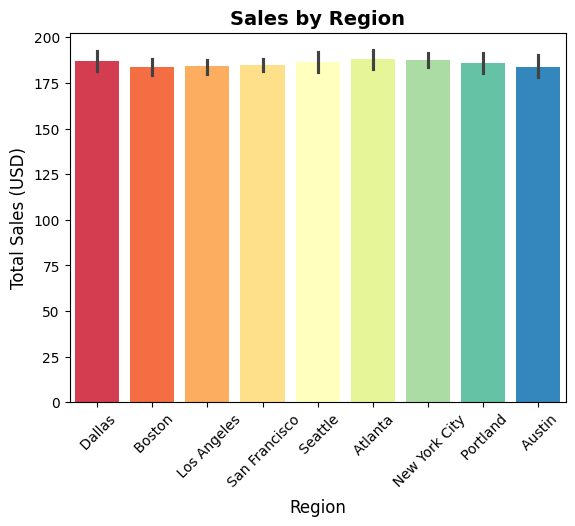

In [48]:
sns.barplot(
    data=cleaned,
    x="City",
    y="Sales",
    palette="Spectral",   # try "Set2", "Paired", "coolwarm", "tab20"
    saturation=1
)

# Labels & title
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.title("Sales by Region", fontsize=14, weight="bold")

# Rotate labels if needed
plt.xticks(rotation=45)

plt.show()